In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set up Notebook
%matplotlib inline
# We do this to ignore several specific warnings
warnings.filterwarnings('ignore')
sns.set_style()

# Disable jedi autocompleter
%config Completer.use_jedi = False

## Figure 1.1

Establish the relationship between salary and demographic varaibles in population survey data.

In [64]:
# load wage data and ignore first column
wage = pd.read_csv('../data/Wage.csv').iloc[:, 1:]
wage.sample(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
1750,2009,25,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.342423,76.893603
2356,2009,45,1. Male,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.732394,113.567090
2440,2004,39,1. Male,2. Married,2. Black,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464


In [65]:
wage['education'].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

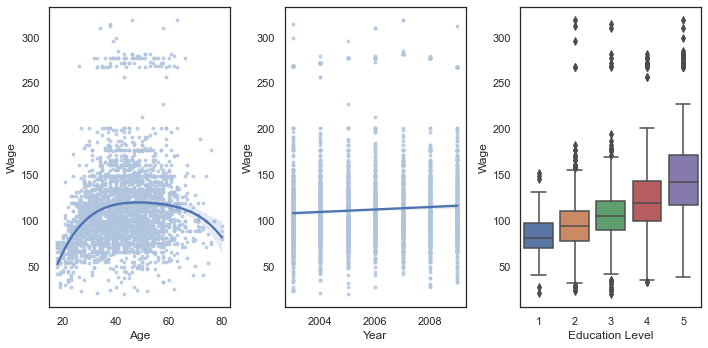

In [66]:
sns.set(context='notebook', style='white')
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

marker_style = dict(color='lightsteelblue', s=8)
ag = sns.regplot(data=wage, x='age', y='wage', order=4, 
                 ax=axs[0], scatter_kws=marker_style)

ye = sns.regplot(data=wage, x='year', y='wage', order=1, 
                 ax=axs[1], scatter_kws=marker_style)

order = ['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']
ed = sns.boxplot(data=wage, y='wage', x='education', order=order, ax=axs[2])
ed.set_xticklabels(['1', '2', '3', '4', '5'])

ag.set(xlabel='Age', ylabel='Wage')
ye.set(xlabel='Year', ylabel='Wage')
ed.set(xlabel='Education Level', ylabel='Wage')
fig.tight_layout()


## Figure 1.2

Goal is to analyze the stock market movement (Up or Down) of the last three days, including the actual day, in order to predict the next day. Since the output variable is also categorical, we have a classification problem in opposition to the above regression problem.

<div class="alert alert-block alert-info">
<b>Lagging:</b> A lagging indicator is an observable or measurable factor that changes sometime after the economic, financial, or business variable with which it is correlated changes. Lagging indicators confirm trends and changes in trends..</div>

In [120]:
# Load stock market data and ignore first column
stock = pd.read_csv('../data/Smarket.csv').iloc[:, 1:]
stock.sample(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
26,2001,0.812,-0.218,-0.865,1.183,-1.334,1.1537,-1.891,Down
1005,2005,-0.610,0.342,-0.143,0.351,-0.363,1.4888,0.398,Up
861,2004,-0.133,0.137,0.597,-0.984,0.454,1.2967,0.262,Up


In [121]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [122]:
# Put all lags in one column. Make 'tidy' data

stock.rename(columns={'Lag1': '1Day',
                     'Lag2': '2Days',
                     'Lag3': '3Days',
                     'Lag4': '4Days',
                     'Lag5': '5Days'}, inplace=True)

tidy_stock = pd.melt(stock, id_vars='Direction',
                     value_vars=['1Day', '2Days', '3Days'],
                     var_name='Lag_type',
                     value_name='Pct_change')
tidy_stock.sample(3)

,Direction,Lag_type,Pct_change
3278,Down,3Days,-0.547
2301,Down,2Days,0.180
2997,Down,3Days,3.320


In [123]:
tidy_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Direction   3750 non-null   object 
 1   Lag_type    3750 non-null   object 
 2   Pct_change  3750 non-null   float64
dtypes: float64(1), object(2)
memory usage: 88.0+ KB


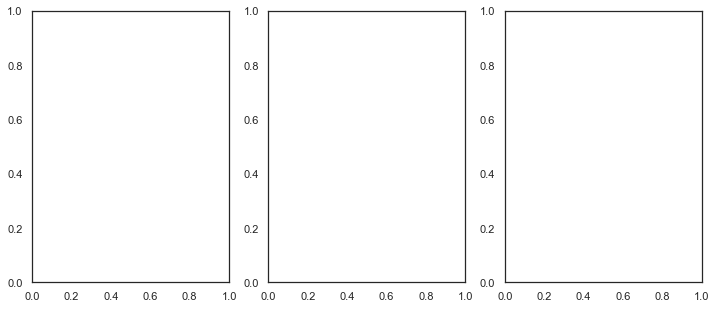

In [124]:
sns.set(context='notebook', style='white')
fig, axs = plt.subplots(1, 3, figsize=(12, 5))



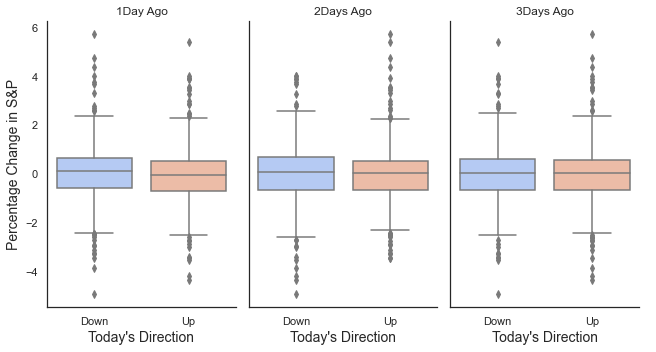

In [125]:
g = sns.catplot(data=tidy_stock, x='Direction', y='Pct_change', 
            col='Lag_type', kind='box', size=5, aspect=.6,
            palette='coolwarm', hue_order=['Down', 'Up'], order=['Down', 'Up'])
g.set_xlabels("Today's Direction", fontsize=14)
g.set_ylabels("Percentage Change in S&P", fontsize=14)
g.set_titles('{col_name} Ago')
g.add_legend()

## Figure 2.1




In [7]:
# Load the advertising data set
f = '../data/Advertising.csv'
# ignore first column
advert = pd.read_csv(f).iloc[:, 1:]
advert.sample(5)

,TV,radio,newspaper,sales
146,240.1,7.3,8.7,13.2
88,88.3,25.5,73.4,12.9
152,197.6,23.3,14.2,16.6
65,69.0,9.3,0.9,9.3
2,17.2,45.9,69.3,9.3


In [36]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


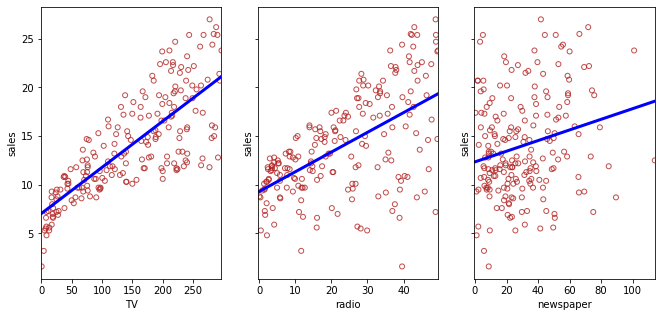

In [35]:
fig, axs = plt.subplots(1, 3, sharey=True,  figsize=(11,5))

for i in range(3):
    sns.regplot(data=advert, y='sales', x=advert.columns[i], 
                ax=axs[i], ci=None,
                line_kws={'color': 'blue', 'lw': 3}, 
                scatter_kws={'edgecolors': 'firebrick', 
                             'facecolors': 'none', 's':25})
    axs[i].set_xlim(xmin=0);

## Figure 2.2

In [38]:
f = '../data/Income1.csv'
income = pd.read_csv(f)
income.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [39]:
income.columns

Index(['Unnamed: 0', 'Education', 'Income'], dtype='object')

Let's drop the first column

In [40]:
income.drop('Unnamed: 0', 1, inplace=True)

In [41]:
income.head()

,Education,Income
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


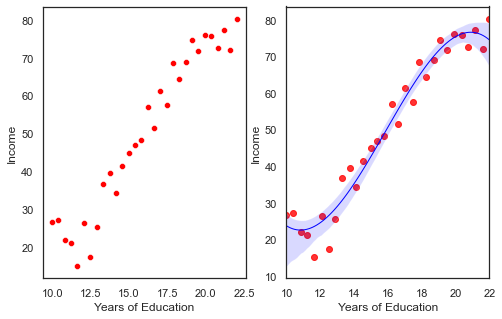

In [42]:
sns.set_style('white')
sns.set_context('notebook')
fig, axs = plt.subplots(1, 2, figsize=(8,5))
sns.scatterplot(data=income, x='Education', y='Income', ax=axs[0], color='red')
sns.regplot(data=income, x='Education', y='Income', 
            ax=axs[1], scatter_kws={'color': 'red'}, 
            line_kws={'color': 'blue', 'lw': 1}, order=3)

axs[0].set_xlabel('Years of Education')
axs[1].set_xlabel('Years of Education');